In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Inlezen van de dataset
data = pd.read_excel("C:/Users/20201954/Desktop/data/merged_data_MRI_isolation_forest.xlsx")
data.replace(',', '.', regex=True, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

# Selecting features and target
#X = data.drop(columns=['muscleID'])  # All columns except the muscle ID (which is the target)
#X = data[['dti_fri', 'dix_t2star', 'dix_r2star', 'trk_dens', 'dti_fa','trk_seed','dti_md', 'dti_rd', 'dti_adci']]
#X = data[['dti_md', 'dti_rd', 'dti_adci']]
X = data[['trk_seed', 'trk_dens', 'dti_md', 'dti_fa', 'dti_fri', 'dix_r2star','dix_dbond', 't2_fatfr', 't2_t2w', 't2_t2f']] # belangrijkste features volgens RF
y = data['muscleID']  # The target column
print(X)
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (normalize the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

      trk_seed  trk_dens    dti_md    dti_fa   dti_fri  dix_r2star  dix_dbond  \
0     0.363608  1.547397  1.385661  0.218869  0.044240   32.360153  11.016443   
1     0.292484  0.862784  1.333043  0.219142  0.038219   41.488840   8.083123   
2     0.361483  1.201093  1.422549  0.205252  0.039611   35.659748  10.307537   
3     0.356667  1.070751  1.412093  0.203801  0.035045   39.659378   7.816146   
4     0.369861  1.960575  1.457258  0.195484  0.036267   36.733351  10.102497   
...        ...       ...       ...       ...       ...         ...        ...   
4373  0.350130  1.458320  1.633937  0.197568  0.043670   36.503349  10.827542   
4374  0.355364  4.720841  1.306104  0.245289  0.046988   37.115158  12.304883   
4375  0.372733  4.749018  1.418036  0.237468  0.043024   39.756321  10.715925   
4376  0.291074  1.440242  1.410382  0.295831  0.081089   32.401951  11.663022   
4377  0.307642  1.518577  1.483786  0.294181  0.080380   34.978676  10.675826   

       t2_fatfr     t2_t2w 

In [3]:
# KNN
# KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on the scaled training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of KNN: {accuracy:.2f}')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of KNN: 0.51

Classification Report:
              precision    recall  f1-score   support

           1       0.31      0.47      0.37        30
           2       0.52      0.88      0.66        26
           3       0.45      0.69      0.55        29
           4       0.21      0.29      0.24        21
           5       0.28      0.33      0.30        15
           6       0.43      0.41      0.42        29
           7       0.37      0.28      0.32        36
           8       0.51      0.54      0.53        35
           9       0.40      0.48      0.44        33
          10       0.67      0.55      0.60        29
          11       0.39      0.68      0.50        22
          12       0.50      0.46      0.48        28
          13       0.47      0.21      0.29        33
          14       0.75      0.11      0.19        28
          15       0.45      0.36      0.40        28
          16       0.60      0.50      0.55        30
          17       0.61      0.69  

Accuracy: 53.65%

Classification Report:
               precision    recall  f1-score   support

           1       0.42      0.33      0.37        30
           2       0.66      0.96      0.78        26
           3       0.47      0.48      0.47        29
           4       0.33      0.33      0.33        21
           5       0.33      0.33      0.33        15
           6       0.39      0.41      0.40        29
           7       0.50      0.33      0.40        36
           8       0.67      0.63      0.65        35
           9       0.43      0.48      0.46        33
          10       0.52      0.79      0.63        29
          11       0.41      0.50      0.45        22
          12       0.41      0.32      0.36        28
          13       0.44      0.36      0.40        33
          14       0.57      0.29      0.38        28
          15       0.36      0.43      0.39        28
          16       0.58      0.47      0.52        30
          17       0.58      0.66      

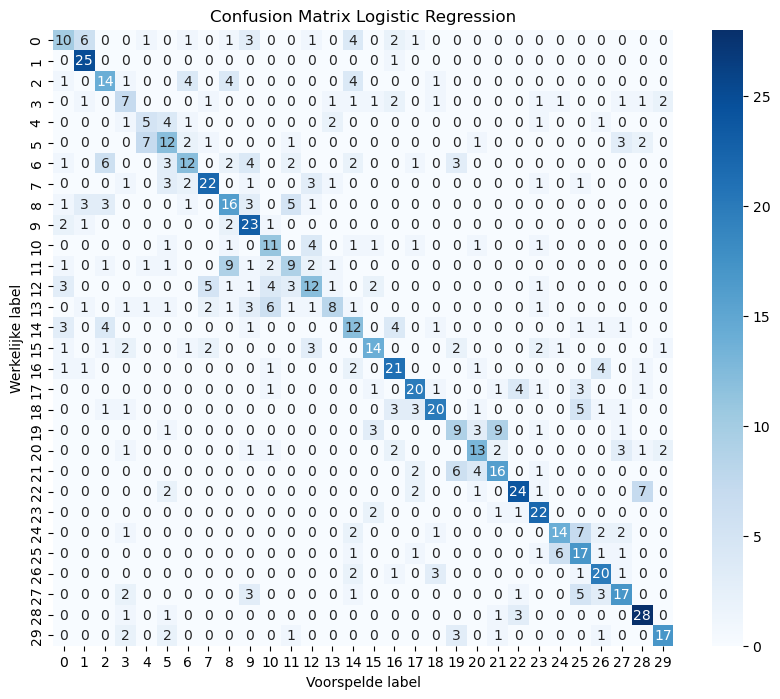

In [4]:
# logistic regression 
logistic_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logistic_model.fit(X_train_scaled, y_train)

# Maak voorspellingen op de testset
y_pred = logistic_model.predict(X_test_scaled)

# Stap 3: Evaluatie van het model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix plotten
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Voorspelde label')
plt.ylabel('Werkelijke label')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

Accuracy: 55.59%

Classification Report:
               precision    recall  f1-score   support

           1       0.49      0.57      0.52        30
           2       0.65      0.92      0.76        26
           3       0.58      0.52      0.55        29
           4       0.40      0.38      0.39        21
           5       0.31      0.53      0.39        15
           6       0.43      0.34      0.38        29
           7       0.48      0.31      0.37        36
           8       0.67      0.69      0.68        35
           9       0.48      0.39      0.43        33
          10       0.58      0.72      0.65        29
          11       0.29      0.45      0.36        22
          12       0.45      0.32      0.38        28
          13       0.42      0.39      0.41        33
          14       0.67      0.07      0.13        28
          15       0.54      0.50      0.52        28
          16       0.71      0.50      0.59        30
          17       0.59      0.62      

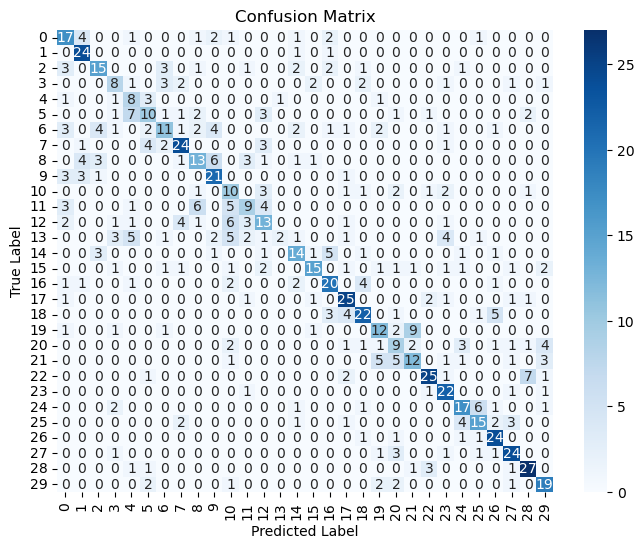

In [5]:
# random forest 
# Train the model using RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [7]:
# neural network 

# Selecting features and target
#X = data.drop(columns=['muscleID'])  # All columns except the muscle ID (which is the target)
#X = data[['dti_fri', 'dix_t2star', 'dix_r2star', 'trk_dens', 'dti_fa', 'trk_seed']]
#X = data[['dti_md', 'dti_rd', 'dti_adci']]
X = data[['trk_seed', 'trk_dens', 'dti_md', 'dti_fa', 'dti_fri', 'dix_r2star','dix_dbond', 't2_fatfr', 't2_t2w', 't2_t2f']] # belangrijkste features volgens RF
y = data['muscleID']  # The target column

# Convert target labels to one-hot encoded (ensure the correct format)
y = to_categorical(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (normalize the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of y_train and y_test to ensure they match the model's output
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

# Create the neural network model
model = Sequential()

# Add an input layer and a hidden layer with 64 neurons and 'relu' activation
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Add an output layer with softmax activation, ensuring it has the correct number of neurons (equal to the number of classes)
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Convert the predictions from one-hot encoding back to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate the accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')



Shape of y_train: (3502, 33)
Shape of y_test: (876, 33)
Epoch 1/50


C:\Users\20201954\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0746 - loss: 3.3778 - val_accuracy: 0.2340 - val_loss: 2.8667
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2971 - loss: 2.7181 - val_accuracy: 0.3664 - val_loss: 2.3663
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4145 - loss: 2.2403 - val_accuracy: 0.4395 - val_loss: 2.0398
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4679 - loss: 1.9362 - val_accuracy: 0.4760 - val_loss: 1.8292
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5124 - loss: 1.7038 - val_accuracy: 0.4886 - val_loss: 1.6980
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5335 - loss: 1.6026 - val_accuracy: 0.5046 - val_loss: 1.6014
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5474 - loss: 1.5018 - val_accuracy: 0.5240 - val_loss: 1.5377
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5639 - loss: 1.4364 - val_accuracy: 0.5331 - val_